- [Imports](#Imports)
- [Data](#Data)
- [Pitcher Overview](#Pitcher-Overview)
    - [Pitch Usage](#Pitch-Usage)
    - [Pitch Usage by Batter Handedness](#Pitch-Usage-by-Batter-Handedness)
    - [Velocity by Pitch Type](#Velocity-by-Pitch-Type)
- [Pitcher Stuff](#Pitcher-Stuff)
    - [Spin Axis](#Spin-Axis)
    - [Velocity & Spin Rate](#Velocity-&-Spin-Rate)
    - [HB & VB Axis](#Horizontal-&-Vertical-Break-Axis)
    - [Release Position](#Release-Postion)
- [Count Breakdown](#Count-Breakdown)
    - [Pitch Usage by Count](#Pitch-Usage-by-Count)
- [Pitch Locations](#Pitch-Locations)
    - [Balls-&Strikes-from-Hitters' Perspective - All-Pitches](#Balls-&-Strikes-from-Hitters'-Perspective--All-Pitches)
- [Heatmaps](#Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Knuckle Curve Heatmaps](#knuckle-Curve-Heatmaps)

# Imports

In [1]:
from math import radians
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
kimbrel = pd.read_csv('../data/craig-kimbrel.csv')
kimbrel.drop(columns = ['Unnamed: 0'], inplace = True)
kimbrel.dropna(subset = ['pitch_type'], inplace = True)

# Font Dictionary
font_title = {
    'size': 14,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(kimbrel.shape)
kimbrel.head(2)

(986, 90)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,bauer_units,swing_miss
0,FF,2021-10-01,96.0,-3.15,4.66,"Kimbrel, Craig",605612,518886,out,hit_into_play,2.0,Harold Castro flies out to center fielder Luis...,R,L,R,CWS,DET,X,8.0,fly_ball,0,1,2021,-0.80,13.08,0.05,2.96,NaN,NaN,NaN,2,8,Top,96.18,55.42,518735,10.270404,-139.413818,-1.331594,-12.849801,32.440511,-17.944816,3.30,1.50,363.0,97.3,32.0,95.9,2339.0,6.4,632274,518886,518735,547989,514917,660162,641313,571740,673357,544725,54.08,0.294,0.509,0.0,1.0,0.0,0.0,5.0,72,2,4-Seam Fastball,8,1,1,8,1,8,1,8,Infield shift,Standard,228.0,0.0,-0.085,1,0-1,-0.05,9.60,24.364583,0
1,FF,2021-10-01,96.5,-3.08,4.82,"Kimbrel, Craig",605612,518886,NaN,called_strike,6.0,Harold Castro flies out to center fielder Luis...,R,L,R,CWS,DET,S,NaN,NaN,0,0,2021,-0.91,16.08,0.38,2.69,NaN,NaN,NaN,2,8,Top,NaN,NaN,518735,11.259937,-140.011728,-3.084673,-14.632779,33.573937,-14.028565,3.36,1.65,NaN,NaN,NaN,96.0,2369.0,6.3,632274,518886,518735,547989,514917,660162,641313,571740,673357,544725,54.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,1,4-Seam Fastball,8,1,1,8,1,8,1,8,Infield shift,Standard,227.0,0.0,-0.018,1,0-0,-0.38,10.92,24.549223,0


In [3]:
kimbrel.groupby('pitch_type').mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,bauer_units,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FF,96.517436,-2.949983,4.779795,596628.485470,518886.0,8.153846,4.572650,1.088889,0.979487,2021.0,-0.856256,14.643487,0.257009,2.804256,615629.181818,593879.589474,596818.515152,0.970940,8.608547,129.917222,103.991667,581904.095726,10.519809,-140.171021,-2.462832,-13.657681,31.364367,-15.694391,3.386564,1.581812,221.854651,85.513372,32.162791,96.875214,2301.417094,6.576581,633475.459829,518886.0,581904.095726,543310.647863,574443.899145,629423.266667,603516.594872,619746.964103,618672.478632,562451.229060,53.921966,0.305028,0.373014,0.292708,1.0,0.111111,0.173611,3.666667,69.885470,3.167521,3.562393,4.005128,2.974359,4.593162,4.017094,3.576068,3.000000,4.593162,225.181197,-0.001713,-0.009169,0.644444,-0.257009,10.275077,23.843141,0.129915
KC,86.076559,-2.891172,4.919277,604564.184539,518886.0,11.336658,3.924051,0.675810,0.962594,2021.0,0.867581,-5.713616,0.456908,1.369825,613497.054054,586304.518987,598919.687500,1.057357,8.610973,113.084167,125.921667,583399.625935,6.217230,-125.254020,-1.238850,7.899309,24.783017,-37.142526,3.364688,1.572768,128.015152,80.259091,6.181818,86.450623,2557.793017,6.482045,633422.413965,518886.0,583399.625935,544141.750623,567092.935162,629201.516209,604187.236908,623552.426434,619039.688279,564049.371571,54.018354,0.298667,0.294861,0.151163,1.0,0.104651,0.000000,2.972222,68.620948,2.753117,3.294264,3.548628,2.720698,4.122195,3.548628,3.304239,2.730673,4.122195,56.112219,-0.003259,-0.031037,0.613466,-0.456908,-10.410973,29.717947,0.254364


In [4]:
#kimbrel.pitch_type.value_counts(normalize = True)
r_kimbrel = kimbrel.loc[(kimbrel['player_name'] == 'Kimbrel, Craig') & (kimbrel['stand'] == 'R')].copy()
l_kimbrel = kimbrel.loc[(kimbrel['player_name'] == 'Kimbrel, Craig') & (kimbrel['stand'] == 'L')].copy()
# all hitters
ff = kimbrel.loc[kimbrel['pitch_type'] == 'FF']
kc = kimbrel.loc[kimbrel['pitch_type'] == 'KC']
# RHH
r_ff = r_kimbrel.loc[r_kimbrel['pitch_type'] == 'FF'] 
r_kc = r_kimbrel.loc[r_kimbrel['pitch_type'] == 'KC']
# LHH
l_ff = l_kimbrel.loc[l_kimbrel['pitch_type'] == 'FF']
l_kc = l_kimbrel.loc[l_kimbrel['pitch_type'] == 'KC']
order = ['FF', 'KC']

# Pitcher Overview

### Pitch Usage

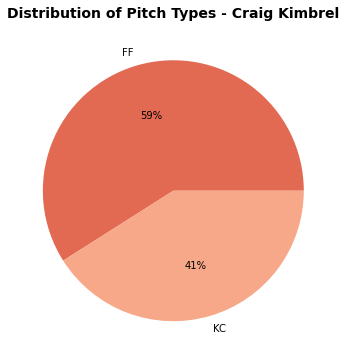

In [5]:
plt.figure(figsize = (8, 6))

dist = round(kimbrel.pitch_type.value_counts(normalize = True), 2)
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = order, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Craig Kimbrel', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

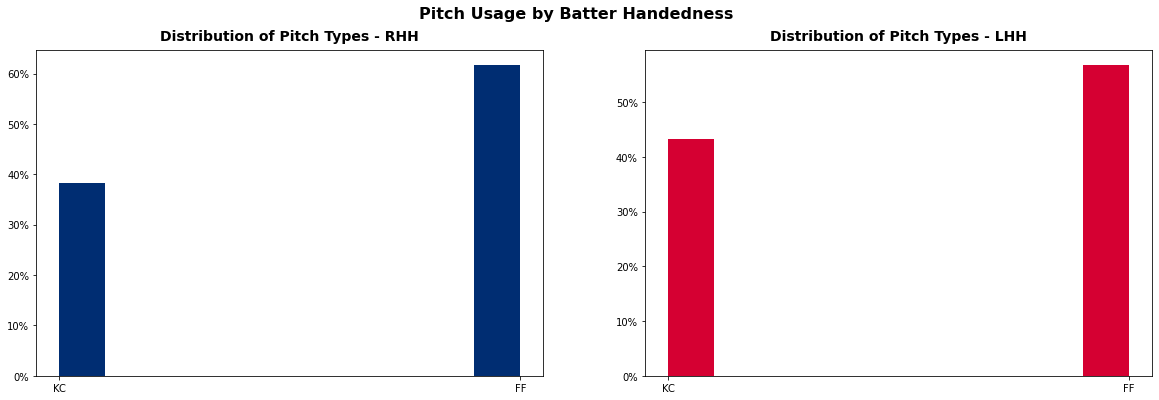

In [6]:
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 16, fontweight = 'bold')

dist_r = r_kimbrel.pitch_type.sort_values(ascending = False)
weights = np.ones(len(dist_r)) / len(dist_r)
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_kimbrel.pitch_type.sort_values(ascending = False)
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

4-Seam velo sits: 96 - 97 mph,  max: 99.0 mph
Knuckle Curve velo sits: 85 - 87 mph,  max: 89.2 mph


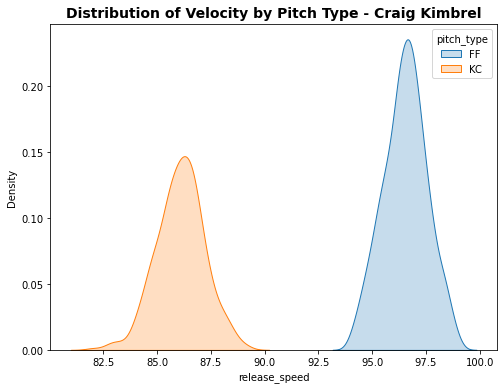

In [7]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = kimbrel, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = order, palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type - Craig Kimbrel', fontdict = font_title, pad = 12)
print('4-Seam velo sits:',round(ff['release_speed'].quantile(.25)),'-',round(ff['release_speed'].quantile(.75)), 
      'mph, ','max:',round(ff['release_speed'].max(),2),'mph')
print('Knuckle Curve velo sits:',round(kc['release_speed'].quantile(.25)),'-',
      round(kc['release_speed'].quantile(.75)),
      'mph, ','max:',round(kc['release_speed'].max(), 2),'mph');

### Pitch Velocity by Pitch Number

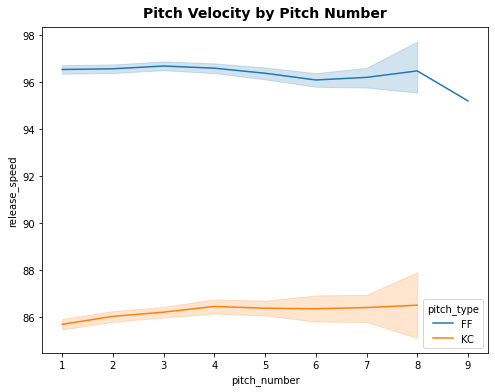

In [8]:
plt.figure(figsize = (8, 6))

sns.lineplot(data = kimbrel, x = 'pitch_number', y = 'release_speed', hue = 'pitch_type',
             hue_order = order, palette = 'tab10')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Spin Axis

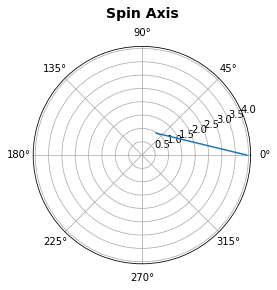

In [9]:
spin_axis = kimbrel.groupby(['pitch_type']).mean()
ax = plt.subplot(polar = True)
ax.plot([radians(x) for x in spin_axis['spin_axis'].values])
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Spin Rate by Pitch Type

4-Seam spin rate: 2246 - 2365 rpm, max: 2575.0 rpm
Knuckle Curve spin rate: 2506 - 2610 rpm, max: 2762.0 rpm


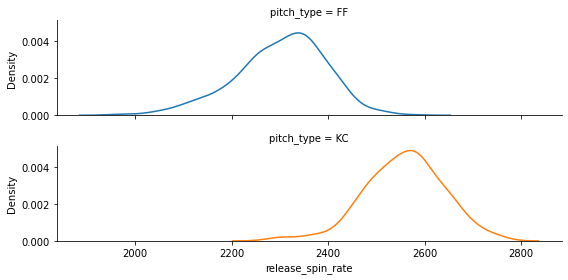

In [10]:
g = sns.FacetGrid(kimbrel, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, );
g.map(sns.kdeplot, 'release_spin_rate', palette = 'tab10')
print('4-Seam spin rate:',round(ff['release_spin_rate'].quantile(.25)),
      '-',round(ff['release_spin_rate'].quantile(.75)),'rpm,','max:',round(ff['release_spin_rate'].max(),2),'rpm')
print('Knuckle Curve spin rate:',round(kc['release_spin_rate'].quantile(.25)),'-',
      round(kc['release_spin_rate'].quantile(.75)),'rpm,','max:',round(kc['release_spin_rate'].max(), 2),'rpm');

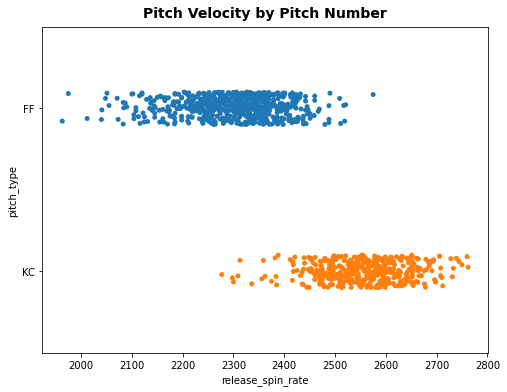

In [11]:
plt.figure(figsize = (8, 6))
sns.stripplot(data = kimbrel, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

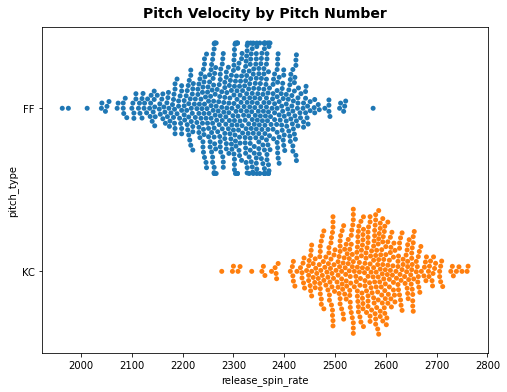

In [12]:
plt.figure(figsize = (8, 6))
sns.swarmplot(data = kimbrel, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

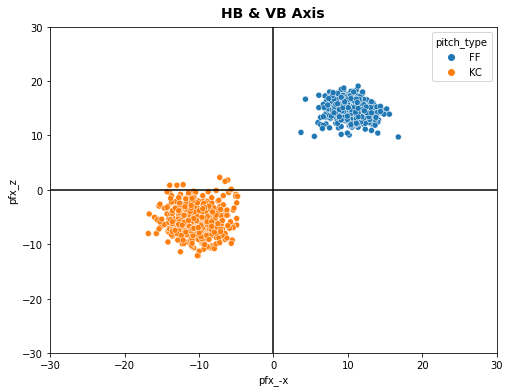

In [13]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Velocity & Spin Rate

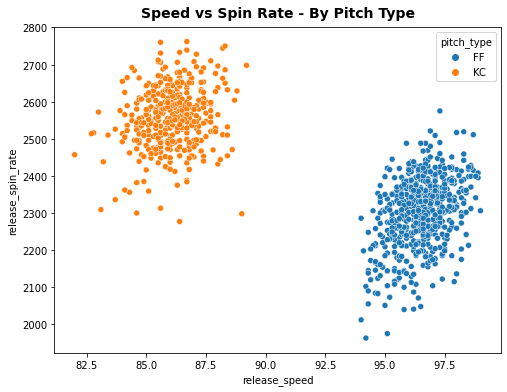

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Release Postion

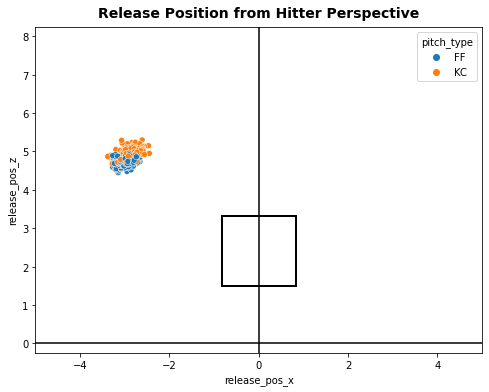

In [15]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = kimbrel, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                 hue_order = order, palette = 'tab10')
plt.xlim(-5, 5), plt.ylim(-0.25, 8.25)
plt.axvline(0, color = 'black'), plt.axhline(0, color = 'black')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

4-Seam Avg Bauer Units: 23.84
Knuckle Curve Avg Bauer Units: 29.72


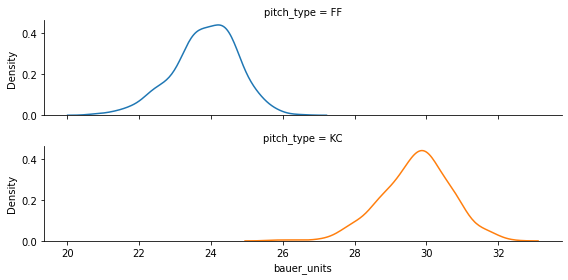

In [16]:
g = sns.FacetGrid(kimbrel, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, )
g.map(sns.kdeplot, 'bauer_units', palette = 'tab10')
print('4-Seam Avg Bauer Units:', round(ff['bauer_units'].mean(), 2))
print('Knuckle Curve Avg Bauer Units:', round(kc['bauer_units'].mean(), 2));

# Count Breakdown

### Pitch Usage by Count

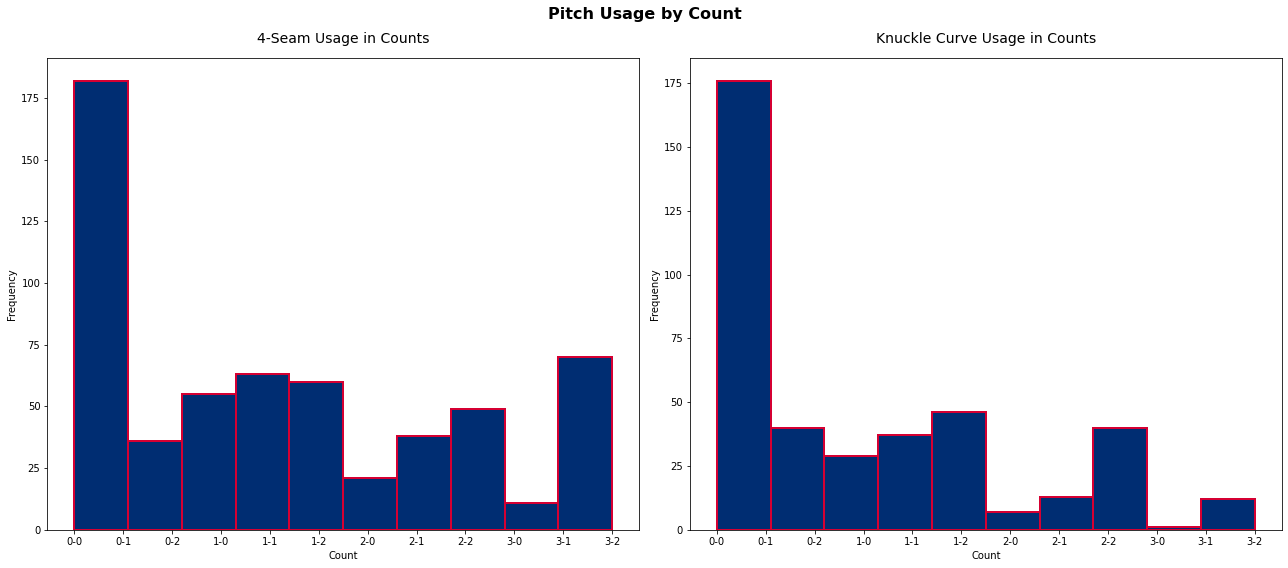

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Pitch Usage by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:], xlabel = 'Count')
plt.setp(axs[0:], ylabel = 'Frequency')
axs[0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0].set_title('4-Seam Usage in Counts', fontsize = 14, pad = 15)
axs[1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1].set_title('Knuckle Curve Usage in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Pitch-Locations

### Balls & Strikes from Hitters' Perspective - All Pitches)

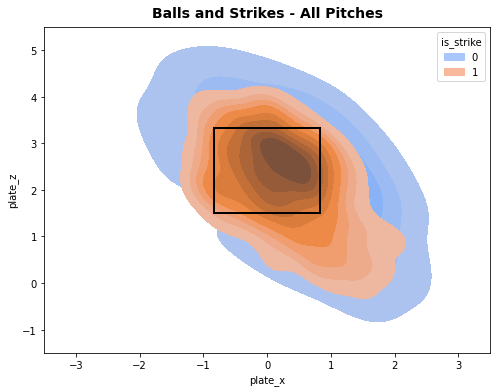

In [18]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = kimbrel, x = 'plate_x', y = 'plate_z', fill = True, palette = 'coolwarm', hue = 'is_strike')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.ylim(-1.5, 5.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Pitch Location by Pitch Type

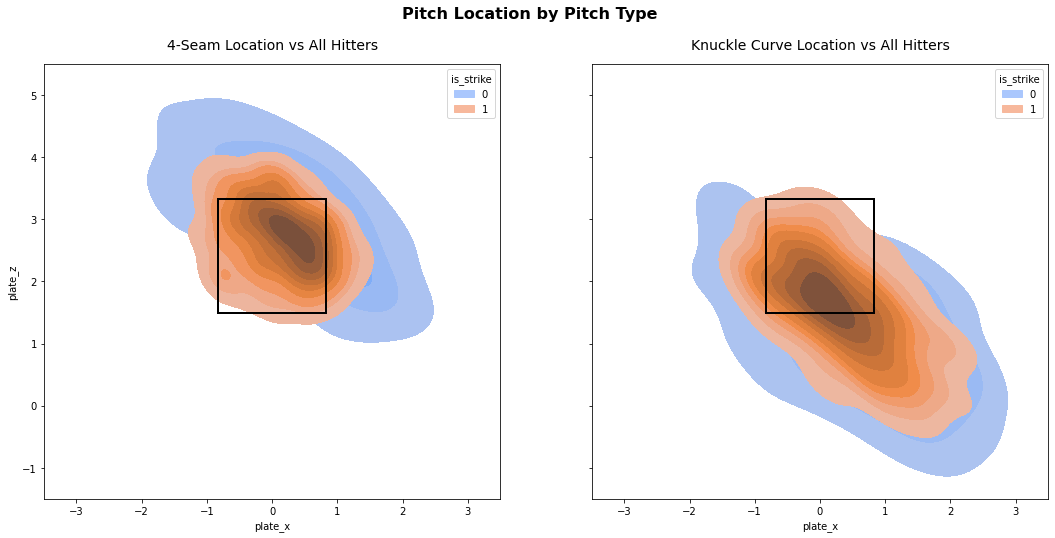

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (18, 8), sharex = True, sharey = True)
fig.suptitle('Pitch Location by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0],data=ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('4-Seam Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1],data=kc,x='plate_x',y='plate_z',fill = True,hue='is_strike',palette='coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Knuckle Curve Location vs All Hitters', fontsize = 14, pad = 15);

### 4-Seam Heatmaps

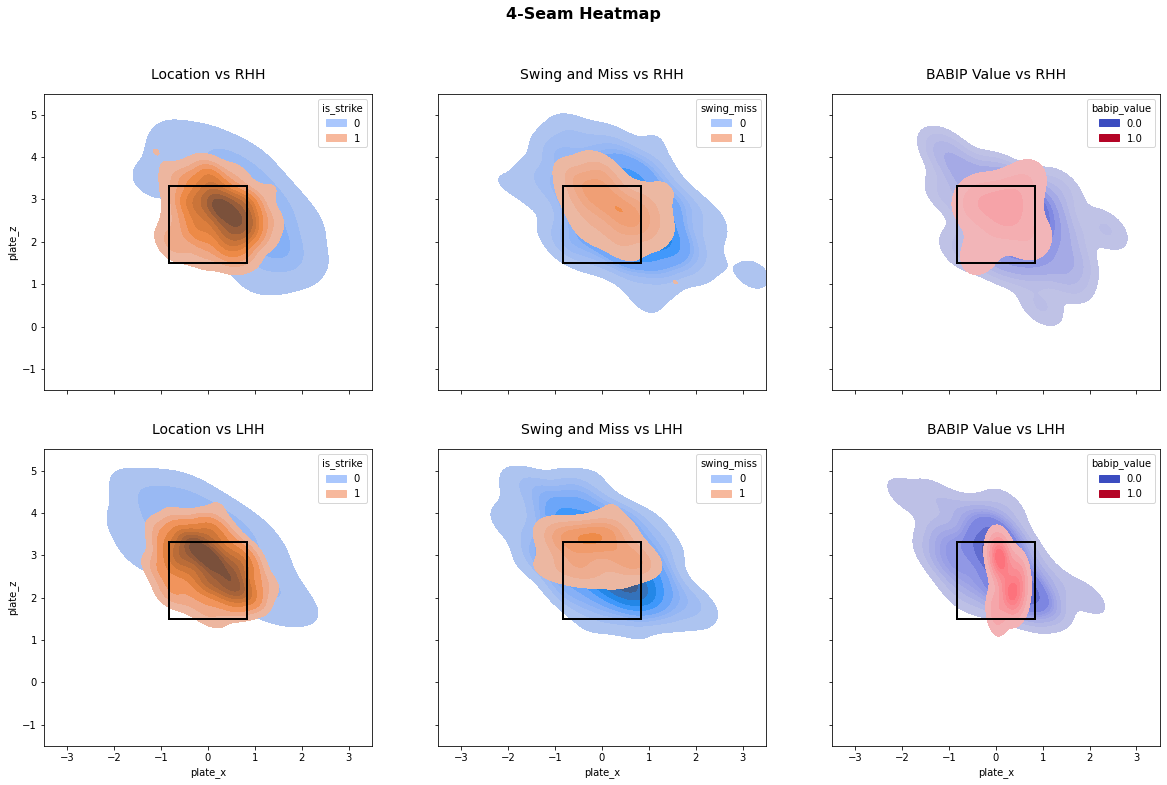

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('BABIP Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('BABIP Value vs LHH', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

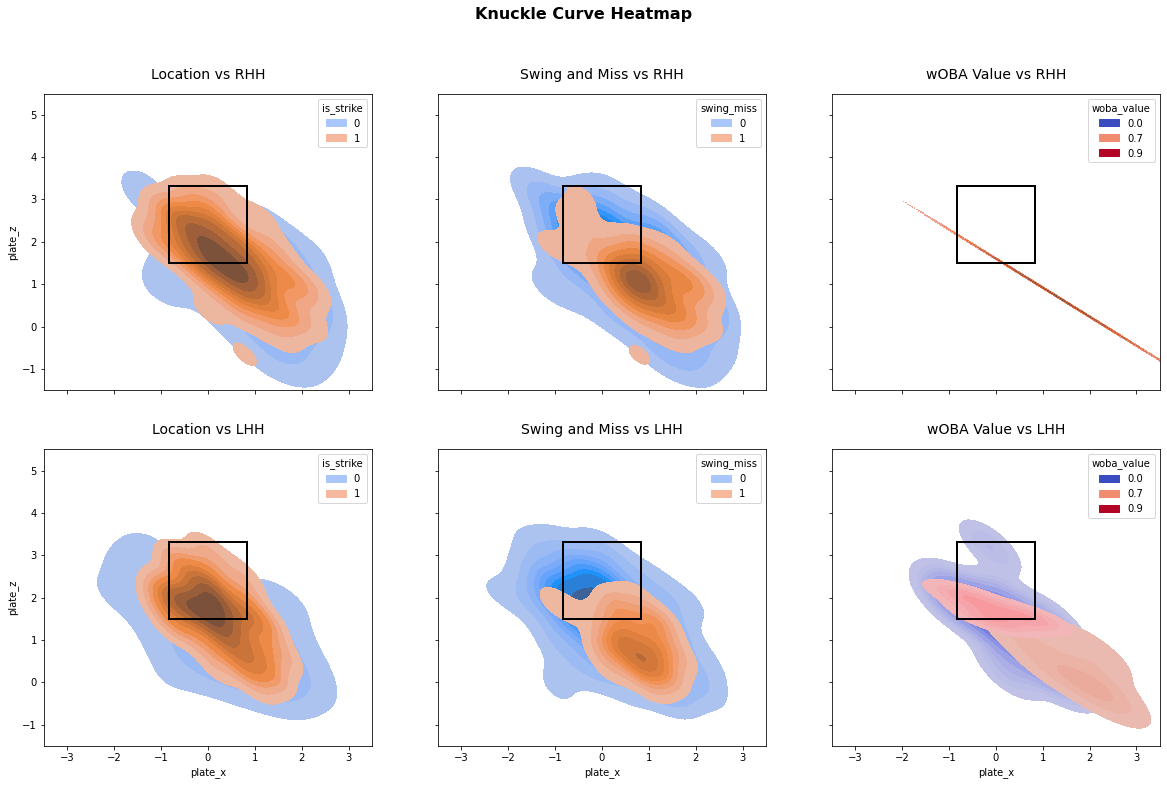

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_kc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_kc,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_kc,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_kc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_kc,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_kc,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 14, pad = 15);